**<h3> This file focuses on implementation of a simple CNN architecture -> train and test model using x-ray image dataset </h3>**

In [ ]:
#Unzip the zipped folder that contains training and testing folders that contains normal and pneumonia sub-folders

!unzip /content/xray_normal_pneumonia.zip

Archive:  /content/xray_normal_pneumonia.zip
   creating: content/train/
  inflating: content/train/pneumonia_person1695_bacteria_4492.jpeg  
  inflating: content/train/normal_00000091_006.png  
  inflating: content/train/normal_00000545_005.png  
  inflating: content/train/pneumonia_person548_bacteria_2299.jpeg  
  inflating: content/train/normal_00000645_001.png  
  inflating: content/train/pneumonia_person1617_bacteria_4256.jpeg  
  inflating: content/train/normal_00000046_000.png  
  inflating: content/train/pneumonia_person262_virus_544.jpeg  
  inflating: content/train/normal_00000557_000.png  
  inflating: content/train/pneumonia_person1719_bacteria_4542.jpeg  
  inflating: content/train/normal_00000474_000.png  
  inflating: content/train/pneumonia_person1098_bacteria_3039.jpeg  
  inflating: content/train/normal_00000750_000.png  
  inflating: content/train/normal_00000862_000.png  
  inflating: content/train/pneumonia_person1380_bacteria_3515.jpeg  
  inflating: content/train

In [ ]:
from posix import listdir
#Move normal and Pneumonia image files into their own sub-folders

import os
import shutil

os.makedirs("/content/content/test/normal", exist_ok = True)
os.makedirs("/content/content/test/pneumonia", exist_ok = True)

for filename in os.listdir("/content/content/test"):

  source_path = os.path.join("/content/content/test", filename)

  if os.path.isfile(source_path):
    if "normal" in filename.lower():
      destination_path = os.path.join("/content/content/test/normal", filename)
      shutil.move(source_path, destination_path)
    elif "pneumonia" in filename.lower():
      destination_path = os.path.join("/content/content/test/pneumonia", filename)
      shutil.move(source_path, destination_path)

In [ ]:
os.makedirs("/content/content/train/normal", exist_ok = True)
os.makedirs("/content/content/train/pneumonia", exist_ok = True)

for filename in os.listdir("/content/content/train"):

  source_path = os.path.join("/content/content/train", filename)

  if os.path.isfile(source_path):
    if "normal" in filename.lower():
      destination_path = os.path.join("/content/content/train/normal", filename)
      shutil.move(source_path, destination_path)
    elif "pneumonia" in filename.lower():
      destination_path = os.path.join("/content/content/train/pneumonia", filename)
      shutil.move(source_path, destination_path)

In [ ]:
#Importing necessary libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = "/content/content/train"
test_dir = "/content/content/test"

<h3> Preprocessing of the image dataset: </h3>



*   Normalization of pixel intensity values
*   Resizing the image for faster training



In [ ]:
#Normalization of pixel intensity values

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Resizing for faster training

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 32, class_mode = "binary", shuffle = True)

Found 2440 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), batch_size = 32, class_mode = "binary", shuffle = True)

Found 610 images belonging to 2 classes.


In [ ]:
#creation of the neural network

model = Sequential([Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#model training

history = model.fit(train_generator, epochs = 5, validation_data = test_generator)

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8162 - loss: 0.9234 - val_accuracy: 0.8918 - val_loss: 0.2773
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9341 - loss: 0.1960 - val_accuracy: 0.9361 - val_loss: 0.2579
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9391 - loss: 0.1731 - val_accuracy: 0.9279 - val_loss: 0.2592
Epoch 4/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9585 - loss: 0.1218 - val_accuracy: 0.9197 - val_loss: 0.2510
Epoch 5/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9729 - loss: 0.0851 - val_accuracy: 0.9311 - val_loss: 0.3296


In [ ]:
#model evaluation

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 755ms/step - accuracy: 0.9430 - loss: 0.2760
Test Loss: 0.3296
Test Accuracy: 93.11%


In [ ]:
#saving the model

model.save('xray_classification_model_simplecnn.h5')

**<h2> Visualization of the image along with the comparison between the prediciton and the actual values </h2>**

In [ ]:
def visualize_predictions(filepath,model):
  img= image.load_img(filepath, target_size = (150, 150))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis = 0)

  predictions = model.predict(img_array)
  predicted_labels = "Pneumonia" if predictions[0][0] > 0.5 else "Normal"
  actual_labels = "Pneumonia" if "pneumonia" in filepath.lower() else "Normal"

  plt.imshow(img_array[0])
  plt.title(f"Prediction: {predicted_labels}  | Actual: {actual_labels}")
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


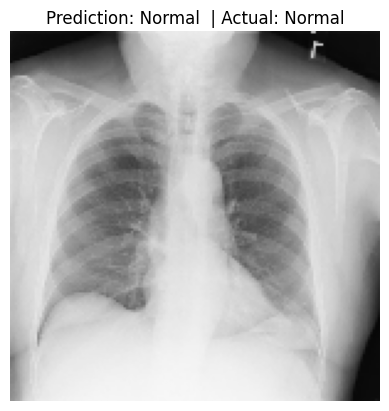

In [ ]:
sample_filepath = "/content/content/test/normal/normal_00000018_000.png"
visualize_predictions(sample_filepath, model)